In [1]:
import random
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
random.seed(42)

In [3]:
df = pd.read_csv('data/z_score_data.csv')
df.head()

,Identifier (RIC),Company Name,Company Name Date of Insolvency,Company Name Score,Revenue (INR) In the last 15 FY,Revenue (INR) In the last 15 FY FY-1,Revenue (INR) In the last 15 FY FY-2,Revenue (INR) In the last 15 FY FY-3,Revenue (INR) In the last 15 FY FY-4,Revenue (INR) In the last 15 FY FY-5,...,OCF/Debt FY-9,OCF/Debt FY-10,OCF/Debt FY-11,OCF/Debt FY-12,OCF/Debt FY-13,OCF/Debt FY-14,Loss in past 2 years,Negative owners equity,Z Score,Discrimination
0,TATS.NS,Tata Steel BSL Ltd,26-07-2017,1,"20,89,160.40","17,40,442.80","15,02,730.20","13,12,406.80","10,64,577.10","9,67,583.30",...,0,0,0,0,0,0,0.0,0.0,-3.478192,Distress Zone
1,SNTX.NS,Sintex Industries Ltd,18-09-2019,1,"3,25,695.00","2,87,268.00","1,92,132.00","94,086.00","7,00,661.00","5,84,262.00",...,0,0,0,0,0,0,0.0,0.0,1.737835,Distress Zone
2,VTL.NZ,Vital Ltd,13-06-2019,1,"16,101.40","15,846.00","16,130.10","15,843.50","24,850.60","31,703.10",...,0,0,0,0,0,0,0.0,0.0,1.612491,Distress Zone
3,IVRC.NS,IVRCL Ltd,08-11-2019,1,"1,25,262.90","1,90,446.20","2,59,748.10","2,99,642.00","3,81,953.90","4,94,470.30",...,0,0,0,0,0,0,1.0,1.0,-0.536752,Distress Zone
4,BILT.NS,Ballarpur Industries Ltd,17-04-2019,1,"3,64,306.00","2,54,614.00","2,17,128.00","4,47,297.00","3,23,863.00","5,28,458.00",...,0,0,0,0,0,0,1.0,1.0,-0.599970,Distress Zone


In [4]:
df.describe()

,Company Name Score,Market Capitalisation (INR) In the last 15 FY,Market Capitalisation (INR) In the last 15 FY FY-1,Market Capitalisation (INR) In the last 15 FY FY-2,Market Capitalisation (INR) In the last 15 FY FY-3,Market Capitalisation (INR) In the last 15 FY FY-4,Market Capitalisation (INR) In the last 15 FY FY-5,Market Capitalisation (INR) In the last 15 FY FY-6,Market Capitalisation (INR) In the last 15 FY FY-7,Market Capitalisation (INR) In the last 15 FY FY-8,...,Pretax ROA (%) In the last 15 FY.1 FY-11,Pretax ROA (%) In the last 15 FY.1 FY-12,Pretax ROA (%) In the last 15 FY.1 FY-13,Pretax ROA (%) In the last 15 FY.1 FY-14,Avg,Working capital/total assets FY-1,Avg ocf/debt,Loss in past 2 years,Negative owners equity,Z Score
count,148.000000,148.0,148.0,148.0,148.0,148.0,148.0,148.0,148.0,148.0,...,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.567568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068243,0.052703,0.043919,0.045270,-0.469595,-0.687162,0.640878,0.513514,0.594595,-24.581444
std,0.497096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106928,0.088407,0.078443,0.099887,1.626551,2.527866,6.236989,0.501515,0.492637,298.773039
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.100000,-0.100000,-0.200000,0.000000,-11.600000,-21.700000,-0.740000,0.000000,0.000000,-3634.654690
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.300000,-0.525000,0.000000,0.000000,0.000000,-0.659982
50%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.256556
75%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.022500,1.000000,1.000000,1.059426
max,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.600000,0.500000,0.300000,0.700000,0.700000,0.600000,75.110000,1.000000,1.000000,6.844779


In [5]:
df.shape

(148, 863)

In [6]:
labels = df['Company Name Score'].values

In [7]:
labels[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [8]:
df.drop(['Identifier (RIC)', 'Company Name', 'Company Name Date of Insolvency', 'Company Name Score',
         'Discrimination'], axis=1, inplace=True)
df.shape

(148, 858)

### Data Preparation

In [9]:
# Deviding with millions to normlize the data
columns = df.columns
print(len(columns))

def convert_string_to_float(x):
    return [float(str(x[col]).replace(",", "").replace(' -   ', str(0)).replace("%", "")) / 1000000 for col in columns]

858


In [10]:
df.replace(to_replace='#DIV/0!', value=0, inplace=True)

In [11]:
df.head()

,Revenue (INR) In the last 15 FY,Revenue (INR) In the last 15 FY FY-1,Revenue (INR) In the last 15 FY FY-2,Revenue (INR) In the last 15 FY FY-3,Revenue (INR) In the last 15 FY FY-4,Revenue (INR) In the last 15 FY FY-5,Revenue (INR) In the last 15 FY FY-6,Revenue (INR) In the last 15 FY FY-7,Revenue (INR) In the last 15 FY FY-8,Revenue (INR) In the last 15 FY FY-9,...,OCF/Debt FY-8,OCF/Debt FY-9,OCF/Debt FY-10,OCF/Debt FY-11,OCF/Debt FY-12,OCF/Debt FY-13,OCF/Debt FY-14,Loss in past 2 years,Negative owners equity,Z Score
0,"20,89,160.40","17,40,442.80","15,02,730.20","13,12,406.80","10,64,577.10","9,67,583.30","10,74,427.00","9,96,117.40","7,00,353.60","5,63,236.90",...,0,0,0,0,0,0,0,0.0,0.0,-3.478192
1,"3,25,695.00","2,87,268.00","1,92,132.00","94,086.00","7,00,661.00","5,84,262.00","5,07,944.00","4,43,677.00","4,47,515.00","3,28,164.00",...,0,0,0,0,0,0,0,0.0,0.0,1.737835
2,"16,101.40","15,846.00","16,130.10","15,843.50","24,850.60","31,703.10","21,215.60","14,295.90","11,679.70","9,421.70",...,0,0,0,0,0,0,0,0.0,0.0,1.612491
3,"1,25,262.90","1,90,446.20","2,59,748.10","2,99,642.00","3,81,953.90","4,94,470.30","4,49,525.40","7,55,742.90","6,83,862.30","5,84,668.30",...,0,0,0,0,0,0,0,1.0,1.0,-0.536752
4,"3,64,306.00","2,54,614.00","2,17,128.00","4,47,297.00","3,23,863.00","5,28,458.00","4,91,274.00","4,80,631.00","4,49,984.00","3,79,459.50",...,0,0,0,0,0,0,0,1.0,1.0,-0.599970


In [12]:
def percentage_change(x):
    for i,col in enumerate(columns):
        try:
            if i < len(columns) and i > 0 :
                if columns[i+1].find(col) >= 0:
                    try:
                        x[i+1] = (x[i+1] - x[i]) / x[i]
                    except:
                        pass
        except:
            pass
    return x

In [13]:
df = df.apply(convert_string_to_float, axis=1)

In [14]:
# df = df.apply(lambda x: convert_string_to_float(x))

In [15]:
df1 = df.copy()

In [16]:
df1 = df1.apply(percentage_change).values

In [17]:
len(df.loc[0])

858

In [19]:
x_data = []
for i, v in enumerate(df1):
    x_data.append(v)
x_data = np.array(x_data)
x_data.shape

(148, 858)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, shuffle=True)

### Linear Models

In [21]:
linear_model = LinearDiscriminantAnalysis()

In [22]:
linear_model.fit(x_train, y_train)

C:\Users\Urvish\AppData\Roaming\Python\Python37\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [23]:
linear_model.coef_.shape

(1, 858)

In [24]:
preds = linear_model.predict(x_test)
accuracy_score(y_test, preds)

0.7027027027027027

In [25]:
f1_score(y_test, preds)

0.7843137254901961

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.43      0.67      0.52         9
           1       0.87      0.71      0.78        28

    accuracy                           0.70        37
   macro avg       0.65      0.69      0.65        37
weighted avg       0.76      0.70      0.72        37



### Non-Linear Models

In [27]:
non_linear_model = QuadraticDiscriminantAnalysis()

In [28]:
non_linear_model.fit(x_train, y_train)

C:\Users\Urvish\AppData\Roaming\Python\Python37\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [29]:
non_linear_preds = non_linear_model.predict(x_test)
accuracy_score(y_test, non_linear_preds)

0.32432432432432434

In [30]:
f1_score(y_test, non_linear_preds)

0.3243243243243243

In [31]:
print(classification_report(y_test, non_linear_preds))

              precision    recall  f1-score   support

           0       0.21      0.67      0.32         9
           1       0.67      0.21      0.32        28

    accuracy                           0.32        37
   macro avg       0.44      0.44      0.32        37
weighted avg       0.56      0.32      0.32        37



In [32]:
from sklearn.svm import SVC

svm  = SVC()
svm.fit(x_train, y_train)
svm_preds = svm.predict(x_test)
print(f'accuracy score {accuracy_score(y_test, svm_preds)}')
print(f'F1 score {f1_score(y_test, svm_preds)}')

accuracy score 0.5135135135135135
F1 score 0.5909090909090908


C:\Users\Urvish\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
import xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier

In [34]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
preds = xgb_model.predict(x_test)
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(classification_report(y_test, preds))

0.8378378378378378
0.8846153846153847
              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.96      0.82      0.88        28

    accuracy                           0.84        37
   macro avg       0.79      0.86      0.81        37
weighted avg       0.87      0.84      0.85        37



In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plot_importance(xgb_model, grid=False, height=0.2)
plt.show()

<Figure size 1500x1500 with 0 Axes>

<Figure size 640x480 with 1 Axes>

In [37]:
feature_importance = xgb_model.feature_importances_

In [38]:
important_features = []
feature_importance_value = []
for i, v in enumerate(feature_importance):
    if v > 0.01:
        important_features.append(columns[i])
        feature_importance_value.append(v)

print(important_features)

['Revenue (INR) In the last 15 FY FY-4', 'EBIT (INR) In the last 15 FY', 'EBIT (INR) In the last 15 FY FY-1', 'Selling/General/Administrative Expense, Total (INR) In the last 15 FY FY-1', 'Interest Expense (INR) In the last 15 FY FY-1', 'Company Market Cap (INR) In the last 15 FY FY-1', 'Company Market Cap (INR)', 'Total Current Liabilities (INR) In the last 15 FY', 'Total Liabilities (INR) In the last 15 FY FY-2', 'Total Liabilities (INR) In the last 15 FY FY-3', 'ROE Common Equity % In the last 15 FY', 'ROE Common Equity % In the last 15 FY FY-5', 'Working Capital (INR) In the last 15 FY FY-7', 'Working Capital (INR) In the last 15 FY FY-8', 'Cost Of Goods Sold - Actual (INR) In the last 15 FY FY-4', 'Total Operating Expense (INR) In the last 15 FY FY-1', 'ratios', 'Current Ratio FY-3', 'Current Ratio FY-8', 'ExpandedCurrent Ratio FY-7', 'EBITDA % FY-11', 'EBITDA % FY-13', 'Financial leverage FY-3', 'Financial leverage FY-6', 'Liability structure FY-2', 'Net income variation 10 years

In [39]:
len(important_features)

31

In [40]:
import seaborn as sns

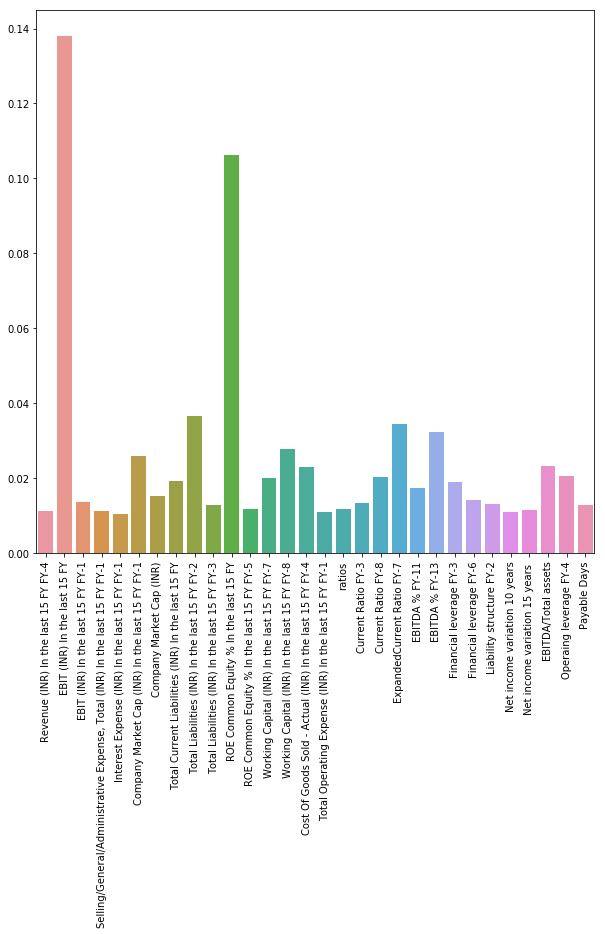

In [41]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=important_features[0:30], y=feature_importance_value[0:30])
plt.xticks(rotation=90)
plt.show()